In [40]:
import numpy as np
import os
import scipy.ndimage
from skimage.feature import hog
from sklearn.model_selection import  train_test_split
from skimage.transform import resize
from skimage.transform import rescale
from skimage.color import rgb2gray
from skimage.io import imread
from sklearn.cluster import KMeans
from scipy import misc
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.externals import joblib
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix, accuracy_score

features_list = []
features_label = []
# load labeled training / test data
# loop over the 10 directories where each directory stores the images of a digit
for digit in range(0,10):
    label = digit
    training_directory = '/Users/vamseemuppavarapu/Desktop/Digit-classification/Dataset/' + str(label) + '/'
    for filename in os.listdir(training_directory):
        if (filename.endswith('.tif')):
            training_digit_image = imread(training_directory + filename)
            
           
            #print(training_digit_image.shape)
            training_digit_image=resize(training_digit_image, (8, 8))
            #training_digit_image=rgb2gray(training_digit_image)
            #print(training_digit_image.shape)
            result=np.array(training_digit_image).flatten()
            
            features_list.append(result)
            #features_list.append(f2)
            features_label.append(label)
            #print(features_list)

/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [41]:
# store features array into a numpy array
features  = np.array(features_list, np.float)
print(features)
print(features.shape)

#x = np.array(features, np.float)
#np.savetxt("/Users/vamseemuppavarapu/Desktop/Digit-classification/features.txt", x)
targets = np.array(features_label, np.float)
X,y=features, targets
k_digits = KMeans(n_clusters=10)
y_pred=k_digits.fit_predict(X)
print(k_digits.cluster_centers_.shape)
#centroids = KMeans.cluster_centers
#labe=KMeans.label



[[0.93667279 0.99099265 0.99074755 ... 0.98471201 0.98615196 0.97460172]
 [0.846875   0.99901961 0.99840686 ... 0.99705882 0.99607843 0.99607843]
 [1.         0.98678002 0.94439338 ... 1.         1.         1.        ]
 ...
 [0.99234069 0.98578431 0.52621017 ... 0.98806679 0.95542279 0.97648591]
 [1.         0.9622549  0.85637255 ... 1.         0.99852941 0.95588235]
 [0.96875    0.96090686 0.92120098 ... 0.84093137 0.96237745 0.99191176]]
(500, 64)
(10, 64)


In [42]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(features, features_label, test_size=0.4, random_state=0)

# runs the kNN classifier for even number of neighbors from 1 to 10
for n in range(1, 10, 2):
        clf = KNeighborsClassifier(n)

        # instance based learning
        clf.fit(X_train, y_train)

        # our 'ground truth'
        y_true = y_test

        # predict
        y_pred = clf.predict(X_test)

        # learning metrics
        cm = confusion_matrix(y_true, y_pred)
        acc = accuracy_score(y_true, y_pred)

        print("Neighbors: %d" % n)
        print("Confusion Matrix")
        print(cm)

        print("Accuracy score: %f" % accuracy_score(y_true, y_pred))

Neighbors: 1
Confusion Matrix
[[18  0  1  0  0  0  0  0  0  0]
 [ 2 12  2  0  0  1  0  1  0  4]
 [ 0  0 13  0  0  0  0  1  1  1]
 [ 0  0  0 15  0  0  2  1  0  0]
 [ 1  4  1  0 10  0  0  3  1  1]
 [ 3  0  1  0  0  8  3  0  0  0]
 [ 0  1  0  4  0  2 16  1  1  0]
 [ 1  1  0  0  0  1  0 16  0  0]
 [ 0  1  1  0  0  0  0  1 15  0]
 [ 3  4  6  2  1  0  3  1  0  7]]
Accuracy score: 0.650000
Neighbors: 3
Confusion Matrix
[[18  1  0  0  0  0  0  0  0  0]
 [ 5 16  1  0  0  0  0  0  0  0]
 [ 0  1 15  0  0  0  0  0  0  0]
 [ 0  0  0 15  0  0  2  1  0  0]
 [ 2  4  2  0 10  0  0  2  0  1]
 [ 3  0  1  0  0  9  2  0  0  0]
 [ 0  0  0  6  0  3 16  0  0  0]
 [ 3  1  0  0  0  0  0 15  0  0]
 [ 0  1  1  0  0  0  0  0 16  0]
 [ 5  5  7  0  1  2  3  0  0  4]]
Accuracy score: 0.670000
Neighbors: 5
Confusion Matrix
[[18  0  1  0  0  0  0  0  0  0]
 [ 2 18  0  0  0  1  0  1  0  0]
 [ 0  0 15  0  0  0  0  0  1  0]
 [ 0  0  0 17  0  0  1  0  0  0]
 [ 0  3  2  0 12  0  0  2  1  1]
 [ 2  0  1  2  0  8  2  0  0  0]


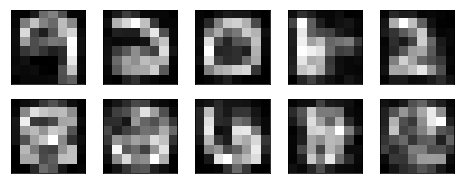

In [43]:
#The shape tells us these are centroids, that is the center of each of the clusters. In essence, 8x8 images of each of the 
#10 digits (atleast we expect it to be). Let's find out by visualizing these using scatter.

fig = plt.figure(figsize=(8,3))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    ax.imshow(np.reshape(k_digits.cluster_centers_[i],(8,8)), cmap=plt.cm.binary)

#That is pretty great. It actually was able to find the clusters of the 10 digits nicely.
#Number 8 doesn't look very clear but everything else looks very good.